In [1]:
import pandas as pd
import sys
import re
import sklearn
import numpy as np

%matplotlib inline

df = pd.read_csv('validation.csv')
#df_s = df.sample(frac=0.1, replace=True)
val_split = np.array_split(df, 3)
len(val_split)

3

In [14]:
validation = val_split[0]
train = val_split[1]
test = val_split[2]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,250,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111"
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,50,FirstView,Na,118,11908,277,118,null,2997,null
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,90,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null
5,0,1,16,903211f027ca70f611544f42b94db094,1,u_VhTTPRKdOIm2Q-C,windows_chrome,116.52.130.*,308,309,...,250,0,1,0,e1af08818a6cd6bbba118bb54a651961,238,49,a5d0bde104fea52ea466c77b37948424,3476,"10077,10075,10059,10052,10083,10031,10057,1000..."
6,0,3,18,15274113eac79b065e186c1962c33632,1,u_Vh5hL5mAOIuVemB,windows_ie,180.173.153.*,79,79,...,90,0,0,52,b90c12ed2bd7950c6027bf9c6937c48a,300,52,361e128affece850342293213691a043,3386,null
7,0,2,0,9c963e762671efbc15c4e9fb3cef9c46,1,u_DAN0n0B6z9B,windows_ie,124.117.229.*,374,375,...,90,FirstView,Na,0,10717,294,86,null,2821,null
8,0,0,7,a483f16043e9f0057d542ee724cd81cb,1,u_VhkrLAFj3cnslVk,windows_ie,14.108.1.*,275,275,...,250,0,0,50,e1af08818a6cd6bbba118bb54a651961,254,212,a5d0bde104fea52ea466c77b37948424,3476,"10063,10006,10059,10083,13403,10031,10110"
9,0,0,7,2da6d0891a81ac8233bba9bcffde2159,1,u_VhkSOxduLTmcjmL,windows_chrome,60.171.29.*,106,110,...,90,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,13042,10006,10110"


In [15]:
#cols = ['weekday', 'hour', 'city', 'bidprice']

cols = ['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag']

train = train[cols]
#pd.get_dummies(df_s)
train.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
99917,0,2,15,211b57cea847fe257f443741677db9b3,1,u_ZYFdPuSqO9KoBCl,windows_ie,218.77.14.*,201,213,...,90,2,0,5,59f065a795a663140e36eec106464524,249,63,f4a09c06b67d0fcce088ee6e86ca052a,3476,"10074,10063,10006,13866,10110"
99918,0,4,14,ace27aadce2d2a303145e7c9376928cf,1,u_DAPEG087uu3,windows_chrome,122.136.135.*,55,64,...,280,OtherView,Na,0,12623,294,50,null,2261,null
99919,0,3,13,15545f07978d53e74125ed3962a03f15,1,u_VhKPZupi3c163dk,mac_safari,58.243.250.*,106,107,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,17,bebefa5efe83beee17a3d245e7c5085b,1458,"10059,10006,10063,10111"
99920,0,3,21,3ea715bb02a9350dc91a6ee8b04a085a,1,u_Vh5hPeqmDINL3fj,windows_chrome,122.71.215.*,1,1,...,250,2,0,5,7097e4210dea4d69f07f0f5e4343529c,300,14,361e128affece850342293213691a043,3386,"10063,10057,10059,10111"
99921,0,3,22,876d4777030fd7e61b854a0c26a18362,1,u_VhkSLypOP4mUkdj,windows_ie,61.141.88.*,216,219,...,600,2,1,0,dba9860463419dcd6c1b0152dfe7314c,227,76,d29e59bf0f7f8243858b8183f14d4412,3358,"10063,10111"


In [16]:
y_train = train['bidprice']
#df_s = df_s.drop('bidprice', 1)

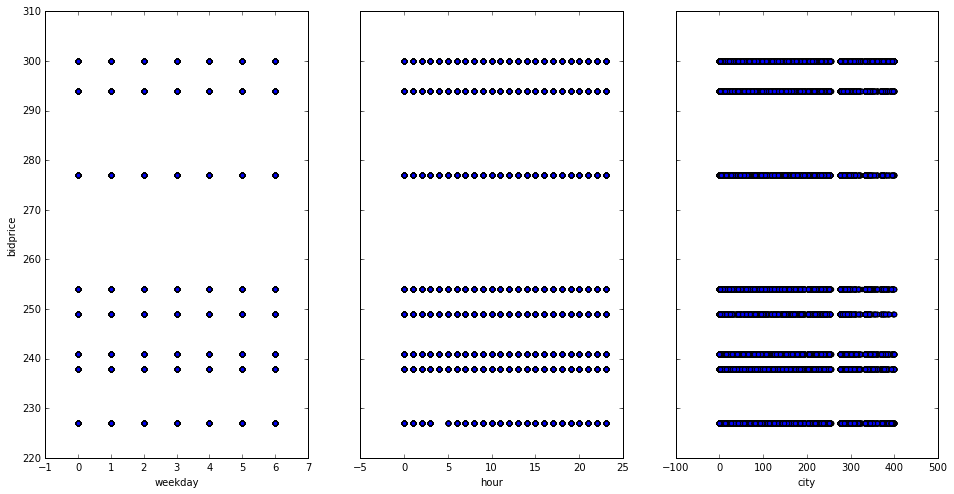

In [6]:
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
train.plot(kind='scatter', x='weekday', y='bidprice', ax=axs[0], figsize=(16, 8))
train.plot(kind='scatter', x='hour', y='bidprice', ax=axs[1])
train.plot(kind='scatter', x='city', y='bidprice', ax=axs[2])

In [34]:
import sklearn
import numpy as np

# create X and y
feats = ['weekday', 'hour', 'city', 'slotprice', 'advertiser']

X = train[feats]
y = train['bidprice']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Things to do

    - Scale data
    - fill na
    - feature sections 
    - One-hot-catergorical
    - CTR

In [35]:
test_ = test[feats]
test_
test_predictions = lm.predict(test_)
test['bid_prediction'] = test_predictions
test[['bid_prediction', 'bidprice']]

,bid_prediction,bidprice
199833,261.601691,241
199834,275.619678,277
199835,261.407861,238
199836,259.958619,254
199837,302.311241,300
199838,257.900658,227
199839,261.009595,241
199840,258.815803,238
199841,262.010453,241
199842,280.915069,277
